<a href="https://colab.research.google.com/github/ssubbinn/ESAA/blob/main/12%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 회귀

**[회귀 소개]**

회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법 통칭

회귀 계수: 독립변수의 값에 영향을 미치는 계수 -> 최적의 회귀 계수를 찾는것이 머신러닝 회귀 예측의 핵심!

<지도학습>

1. 분류 : 예측값이 category 값 같은 이산형 클래스 값
2. 회귀 : 예측값이 숫자값 같은 연속값

<선형 회귀 모델>
- 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델

- 릿지 : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 모델

- 라쏘 : 선형 회귀에 L1 규제를 적용한 방식. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피쳐의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것

- 엘라스틱넷 : L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에 적용, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기 조정

- 로지스틱 회귀 : 분류에 사용되는 선형 모델. 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임



**[단순 선형 회귀를 통한 회귀 이해]**

단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나

잔차 : 회귀 모델의 차이에 따른 오류 값 -> 잔차 최소

- yhat=w0+w1*x+오류 값




**[비용 최소화하기 - 경사 하강법 소개]**

경사하강법 
- 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS 를 최소화하는 방법을 직관적으로 제공하는 방식 
- 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 최소가 되는 W 구하는 방식

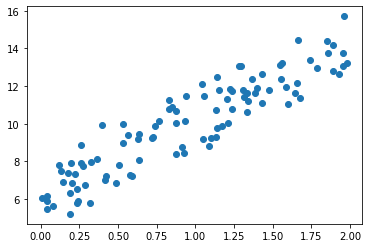

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y= 4X + 6을 근사. 임의의 값은 노이즈를 위해 만듦
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
#비용 함수 정의
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [3]:
#w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  #먼저 w1_update,w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0 값으로초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
  w0_factors=np.ones((N,1))

  #w1과 w0을 업데이트 할 w1_update, w0_update 계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y,iters=10000):
  #w0과 w1을 모두 0으로 초기화
  w1=np.zeros((1,1))
  w0=np.zeros((1,1))

  #인자로 주어진iters 만큼 반복적으로 get_weight_updates() 호출해 w1,w0 업데이트 수행
  for ind in range(iters):
   w1_update, w0_update= get_weight_updates(w1,w0,X,y,learning_rate=0.01)
   w1=w1-w1_update
   w0=w0-w0_update

  return w1,w0

In [5]:
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1,w0=gradient_descent_steps(X,y,iters=10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))
#실제와 비슷

w1:3.968 w0:6.222
Gradient Descent Total Cost:0.9924


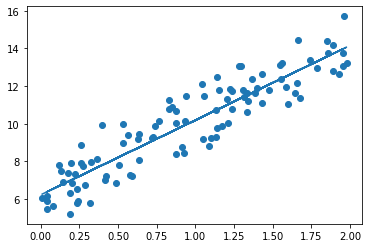

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred)

실전에서는 시간이 오래걸리기 때문에 확률적 경사 하강법 이용

In [7]:
def stochastic_gradient_descent_steps(X,y, batch_size=10,iters=1000):
  #w0과 w1을 모두 0으로 초기화
  w1=np.zeros((1,1))
  w0=np.zeros((1,1))

  prev_cost=100000
  iter_index=0

  #인자로 주어진iters 만큼 반복적으로 get_weight_updates() 호출해 w1,w0 업데이트 수행
  for ind in range(iters):
    np.random.seed(ind)
    #전체 데이터에서 랜덤하게 batch size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]

    w1_update, w0_update= get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [8]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


**[다항 회귀와 과적합 / 과소적합 이해]**
1. 다항 회귀 이해
모든 관계를 직선으로만 표현할 수 없고 독립변수의 단항식이 아니라 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 말함.

- 다항 회귀는 선형 회귀이다. 회귀에서 선형을 따지는 것은 회귀 계수가 선형/비선형인지 따른 것이기 때문이다.

In [9]:
#polynomialFeatures를 이용해 단항값[x1,x2]를 2차 다항갑승로 [1,x1,x2,x1^2,x1x2,x2^2]로 변환하느 ㄴ예제
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2행렬 생성
X= np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n',X)

#degree= 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 반환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처 : \n", poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [10]:
#3차 다항 계수 피처 값이 입력되면 결정 값을 반환하는 함수

def polynomial_func(X):
  y= 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y=polynomial_func(X)
print("삼차 다항식 결정값 : \n",y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [11]:
#3차 다항식 변환
poly_tfr = PolynomialFeatures(degree=3).fit_transform(X)
print("삼차 다항식 계수 feature:\n",poly_ftr)

from sklearn.linear_model import LinearRegression
#Lineaer Regression 에 차 다항식 계쑤 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 \n',np.round(model.coef_, 2))
print('Polynomial 회귀 shape :',model.coef_.shape)

삼차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]
Polynomial 회귀 계수 
 [0.   1.94 1.94 3.87 5.81 7.74]
Polynomial 회귀 shape : (6,)


일차 단항식 계수 피처는 2개였지만 3차 다항식 polynomial변환 이후에는 다항시 ㄱ꼐수 피처가 10개로 늘어남.

- 다항 회귀 구현 : 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계쑤가 늘어남.

In [12]:
# 사이킷런의 Pipeline객체를 이용해 한 번에 다항 회귀를 구현해봄
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
   y=1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
   return y

#Pipeline객체로 Streamline하게 polynomial featre변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear', LinearRegression())])

X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model= model.fit(X,y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**[다항 회귀를 이용한 과소적합 및 과적합 이해]**

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples =30
X= np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y= true_fun(X) +np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.

Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.

Degree 4 MSE는 0.04320874987232072 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.

Degree 15 MSE는 180526263.3177066 입니다.


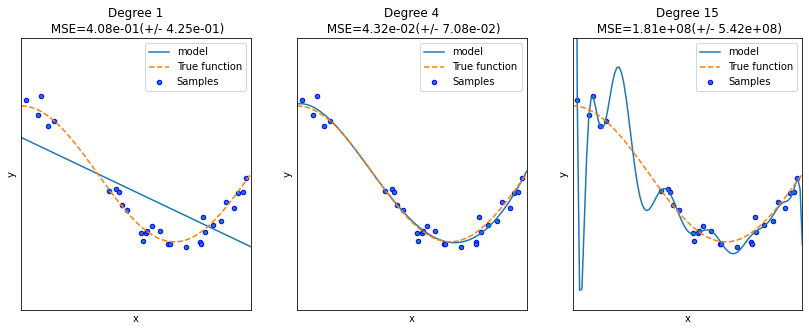

In [15]:
#예측 결과를 비교할 다항식 차수를 각각 1,4,15로 변경하면서 예측결과 비교
plt.figure(figsize=(14,5))
degrees=[1,4,15]


#다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax=plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(), yticks=())

  #개별 degree별로 Polynomial 변환
  polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  #교차 검증으로 다항 회귀 평가
  scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  #pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients=pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
  print('\nDegree {0} MSE는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))
  
  #0부터 1까지 테스트 데이터 세트르 100개로 나눠 예측을 수행
  #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test=np.linspace(0,1,100)
  #예측값 곡선
  plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='model')
  #실제값 곡선
  plt.plot(X_test,true_fun(X_test),'--',label='True function')
  plt.scatter(X,y,edgecolor='b',s=20,label='Samples')

  plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc='best')
  plt.title('Degree {}\n MSE={:.2e}(+/- {:.2e})'.format(degrees[i],-scores.mean(),scores.std()))

plt.show()

실선 곡선 : 다항 회귀 예측 곡선
점선 ㄱ곡선:  실제 데이터 세트의 코사인 곡선

- 맨 왼쪽의 DEGREE1예측 곡선은 단순한 직선으로서 단순선형회귀와 같다.

- 가운데 DEGRES4예측 곡선은 실제 데이터 세트와 유관한 모습

- 맨 오른쪽 DEGREE15예측 곡선은 mse값이 어처구니 없는 값 발생.

-> 좋은 모델 : 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형잡힌 모델

**[편향 - 분산 프레이드 오프]**

- 지나치게 한 방향으로 치우친 경향이 있으며 이런 모델을 고분산성을 가졌다고 표현

- 높은 평향/낮은 분산에서 과소적합되기 쉬우며 낮은 평향/높은 분산에서 과적합 되기 쉽다.

- 편향과 분산이 서로 프레이드 오프를 이루면서 오류 COST값이 최대로 낮아지는 모델을 구축하는 것이 가장 